In [1]:
import os
wd = os.getcwd()
print (f'working directory: {wd}')


bucket = 'fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01'

working directory: /home/jupyter/iST_Platform_Comparison/edit


# Install pacage and grab scripts (only need to run once)
You won't need to do it again for other notebooks.

In [8]:
# # # copy scripts
# cmd = f'gsutil cp gs://{bucket}/notebooks/* {wd}'
# print (cmd)
# ! {cmd}

# # install pacakges
! pip install squidpy==1.2.3 
! pip install geopandas==0.13.0 
! pip install -U kaleido
! pip install rtree==1.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Copy data from bucket to VM

In [3]:
# # copy data
bucket = 'fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01'
cmd = f'gsutil cp -r gs://{bucket}/data {wd}'
print (cmd)
! {cmd}

gsutil cp -r gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data /home/jupyter/iST_Platform_Comparison/edit
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/Sample_Info_HTMA_TMA - Sheet1.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/Sample_Info_NORMAL_TMA - Sheet1.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/cosmx_multitissue_htma_cell_by_gene.parquet.gzip...
- [3 files][ 27.0 MiB/ 27.0 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/cosmx_multitissue_normal_cell_by_gene.parquet.gzip...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/cell_by_gene_csv/merscope_breast_htma_cell_by_gene.parq

Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/cell_by_gene.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/cell_metadata.csv...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/dapi_by_core/mosaic_DAPI_z3.tif_.gstmp...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.cpg...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.dbf...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.prj...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.shp...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_normal/merscope_breast_normal_polygon.shx...
Copying gs://fc-809bcaf6-66cc-4edc-a6ad-f8c671d31a01/data/merscope_breast_norma

In [8]:
sample = 'xenium_panhuman_htma'

# Cell level data

In [9]:
gdf = gpd.read_parquet(f'{wd}/data/cell_level_csv/{sample}_cell_level.parquet.gzip')
gdf.head()

# you can load the data faster use pandas with pyarrow engine if you don't care the geometry column
# df = pd.read_parquet(f'data/cell_by_gene_csv/{sample}_cell_by_gene.parquet.gzip', engine='pyarrow')


,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,total_counts,cell_area,nucleus_area,x,y,core,tissue_type,geometry
0,aaaaadff-1,834.049634,17511.635254,219,0,0,0,219,413.947344,41.453437,17511.635254,834.049634,160,OV,POINT (17511.63525 834.04963)
1,aaaabbnk-1,848.720486,17527.650781,237,0,0,0,237,425.958906,70.398594,17527.650781,848.720486,160,OV,POINT (17527.65078 848.72049)
2,aaaadpga-1,832.824646,17531.993750,332,0,0,0,332,317.042031,68.411719,17531.993750,832.824646,160,OV,POINT (17531.99375 832.82465)
3,aaaaedjb-1,821.008847,17529.862109,241,0,0,0,241,212.505313,62.857500,17529.862109,821.008847,160,OV,POINT (17529.86211 821.00885)
4,aaaagdik-1,832.214175,17552.196191,252,0,0,1,253,233.638438,69.992188,17552.196191,832.214175,160,OV,POINT (17552.19619 832.21418)


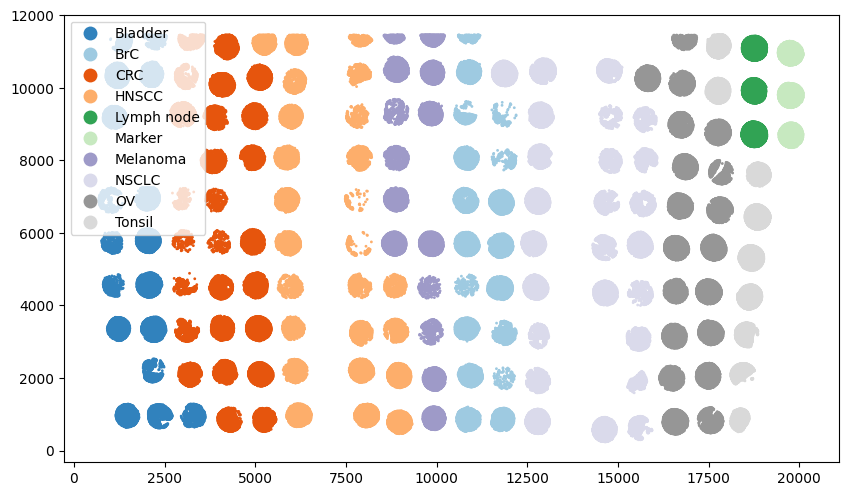

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot('tissue_type',aspect=1, markersize=1, ax=ax, legend=True, cmap='tab20c')
plt.show()

# Cell by gene data

In [ ]:
df = pd.read_parquet(f'data/cell_by_gene_csv/{sample}_cell_by_gene.parquet.gzip', engine='pyarrow')
df = df.reset_index(drop=True)
df.head()

# Gene level data

In [ ]:
df = pd.read_csv(f'data/gene_level_csv/gene_level_csv_{sample}.csv', engine='pyarrow')
df.head()

# Transcript level data

In [ ]:
gdf = gpd.read_parquet(f'data/transcript_level_csv/{sample}_transcript_level.parquet.gzip')
gdf.head()